In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('Telecom_customer_churn.csv')

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df.drop(["customerID"],axis=1,inplace=True)

In [7]:
df["SeniorCitizen"] = df["SeniorCitizen"].astype(object)

In [8]:
Categorical = [ 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 
            'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
            'Contract', 'PaperlessBilling', 'PaymentMethod','SeniorCitizen', 'Churn']
Numerical = ['tenure','MonthlyCharges','TotalCharges']

In [9]:
Categorical = list((df.select_dtypes(include="object").columns))
Numerical = list((df.select_dtypes(exclude="object").columns))

In [10]:
df.duplicated().sum()

22

In [11]:
df.drop_duplicates(keep="last",inplace=True)

In [12]:
df.shape


(7021, 20)

In [13]:
df["TotalCharges"].unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [14]:
df[df["TotalCharges"].isin([" ","NA","-"])==True]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [15]:
df["TotalCharges"] = df["TotalCharges"].replace(" ",np.nan)

In [16]:
df["TotalCharges"] = df["TotalCharges"].astype(float)

In [17]:
df["TotalCharges"].fillna(df["TotalCharges"].mean(),inplace=True)

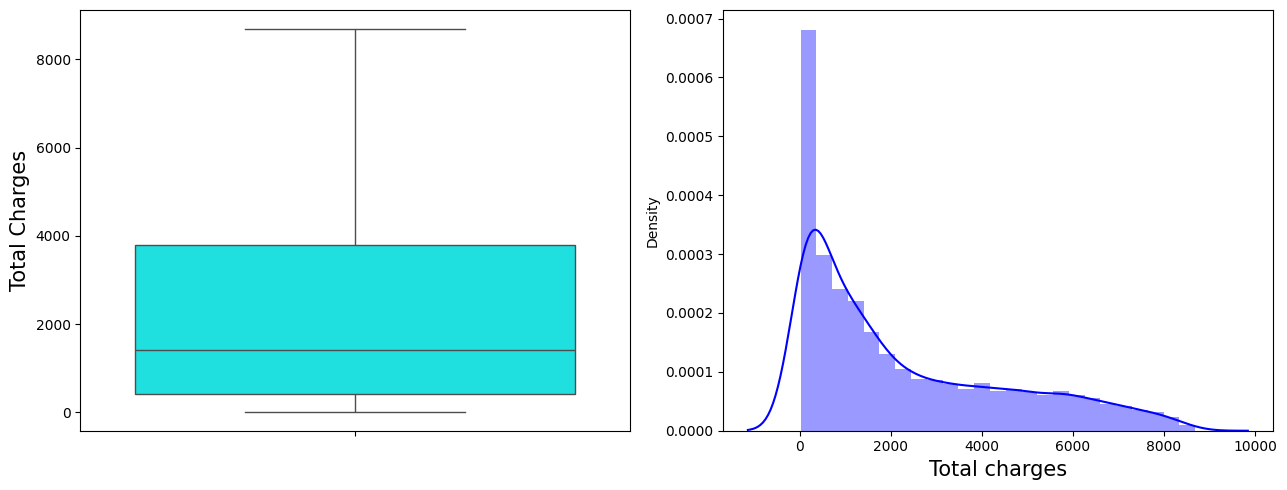

In [18]:
plt.figure(figsize=(13,5))
plt.subplot(1,2,1)
sns.boxplot(y="TotalCharges",data=df,color="cyan")
plt.ylabel("Total Charges",fontsize=15)
plt.subplot(1,2,2)
sns.distplot(df["TotalCharges"],color="b")
plt.xlabel("Total charges",fontsize=15)
plt.tight_layout()
plt.show()

In [19]:
df["TotalCharges"]=df["TotalCharges"].fillna(df["TotalCharges"].mean())

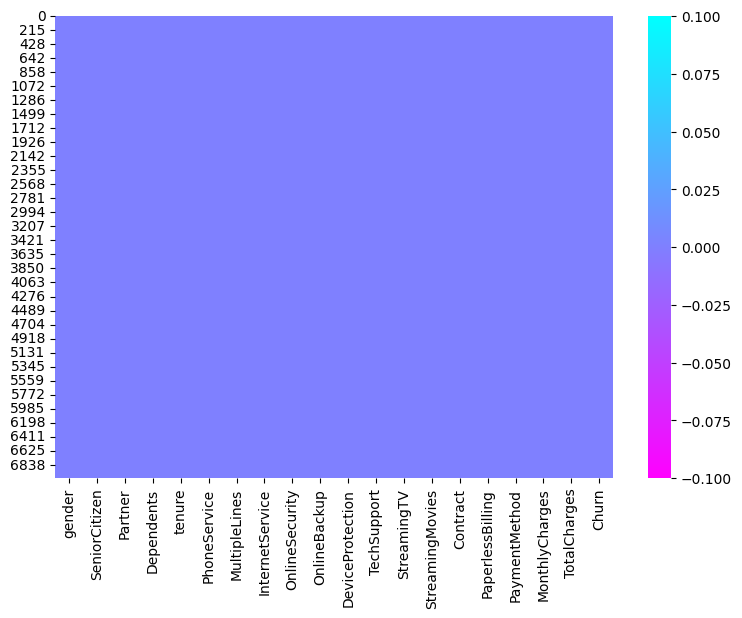

In [20]:
plt.figure(figsize=(9,6))
sns.heatmap(df.isnull(),cmap="cool_r")
plt.show()

In [21]:
df.describe().T.style.background_gradient(subset=["mean","std","50%","count"],cmap="RdPu")

,count,mean,std,min,25%,50%,75%,max
tenure,7021.000000,32.469449,24.534965,0.000000,9.000000,29.000000,55.000000,72.000000
MonthlyCharges,7021.000000,64.851894,30.069001,18.250000,35.750000,70.400000,89.900000,118.750000
TotalCharges,7021.000000,2290.353388,2265.044136,18.800000,411.150000,1410.250000,3801.700000,8684.800000


In [22]:
Numerical=df.select_dtypes(exclude="object")
Categorical=df.select_dtypes(include="object")

In [23]:
for i in Categorical:
    print(i)
    print(df[i].value_counts())
    print("="*100)

gender
gender
Male      3541
Female    3480
Name: count, dtype: int64
SeniorCitizen
SeniorCitizen
0    5880
1    1141
Name: count, dtype: int64
Partner
Partner
No     3619
Yes    3402
Name: count, dtype: int64
Dependents
Dependents
No     4911
Yes    2110
Name: count, dtype: int64
PhoneService
PhoneService
Yes    6339
No      682
Name: count, dtype: int64
MultipleLines
MultipleLines
No                  3368
Yes                 2971
No phone service     682
Name: count, dtype: int64
InternetService
InternetService
Fiber optic    3090
DSL            2419
No             1512
Name: count, dtype: int64
OnlineSecurity
OnlineSecurity
No                     3490
Yes                    2019
No internet service    1512
Name: count, dtype: int64
OnlineBackup
OnlineBackup
No                     3080
Yes                    2429
No internet service    1512
Name: count, dtype: int64
DeviceProtection
DeviceProtection
No                     3087
Yes                    2422
No internet service    1512
N

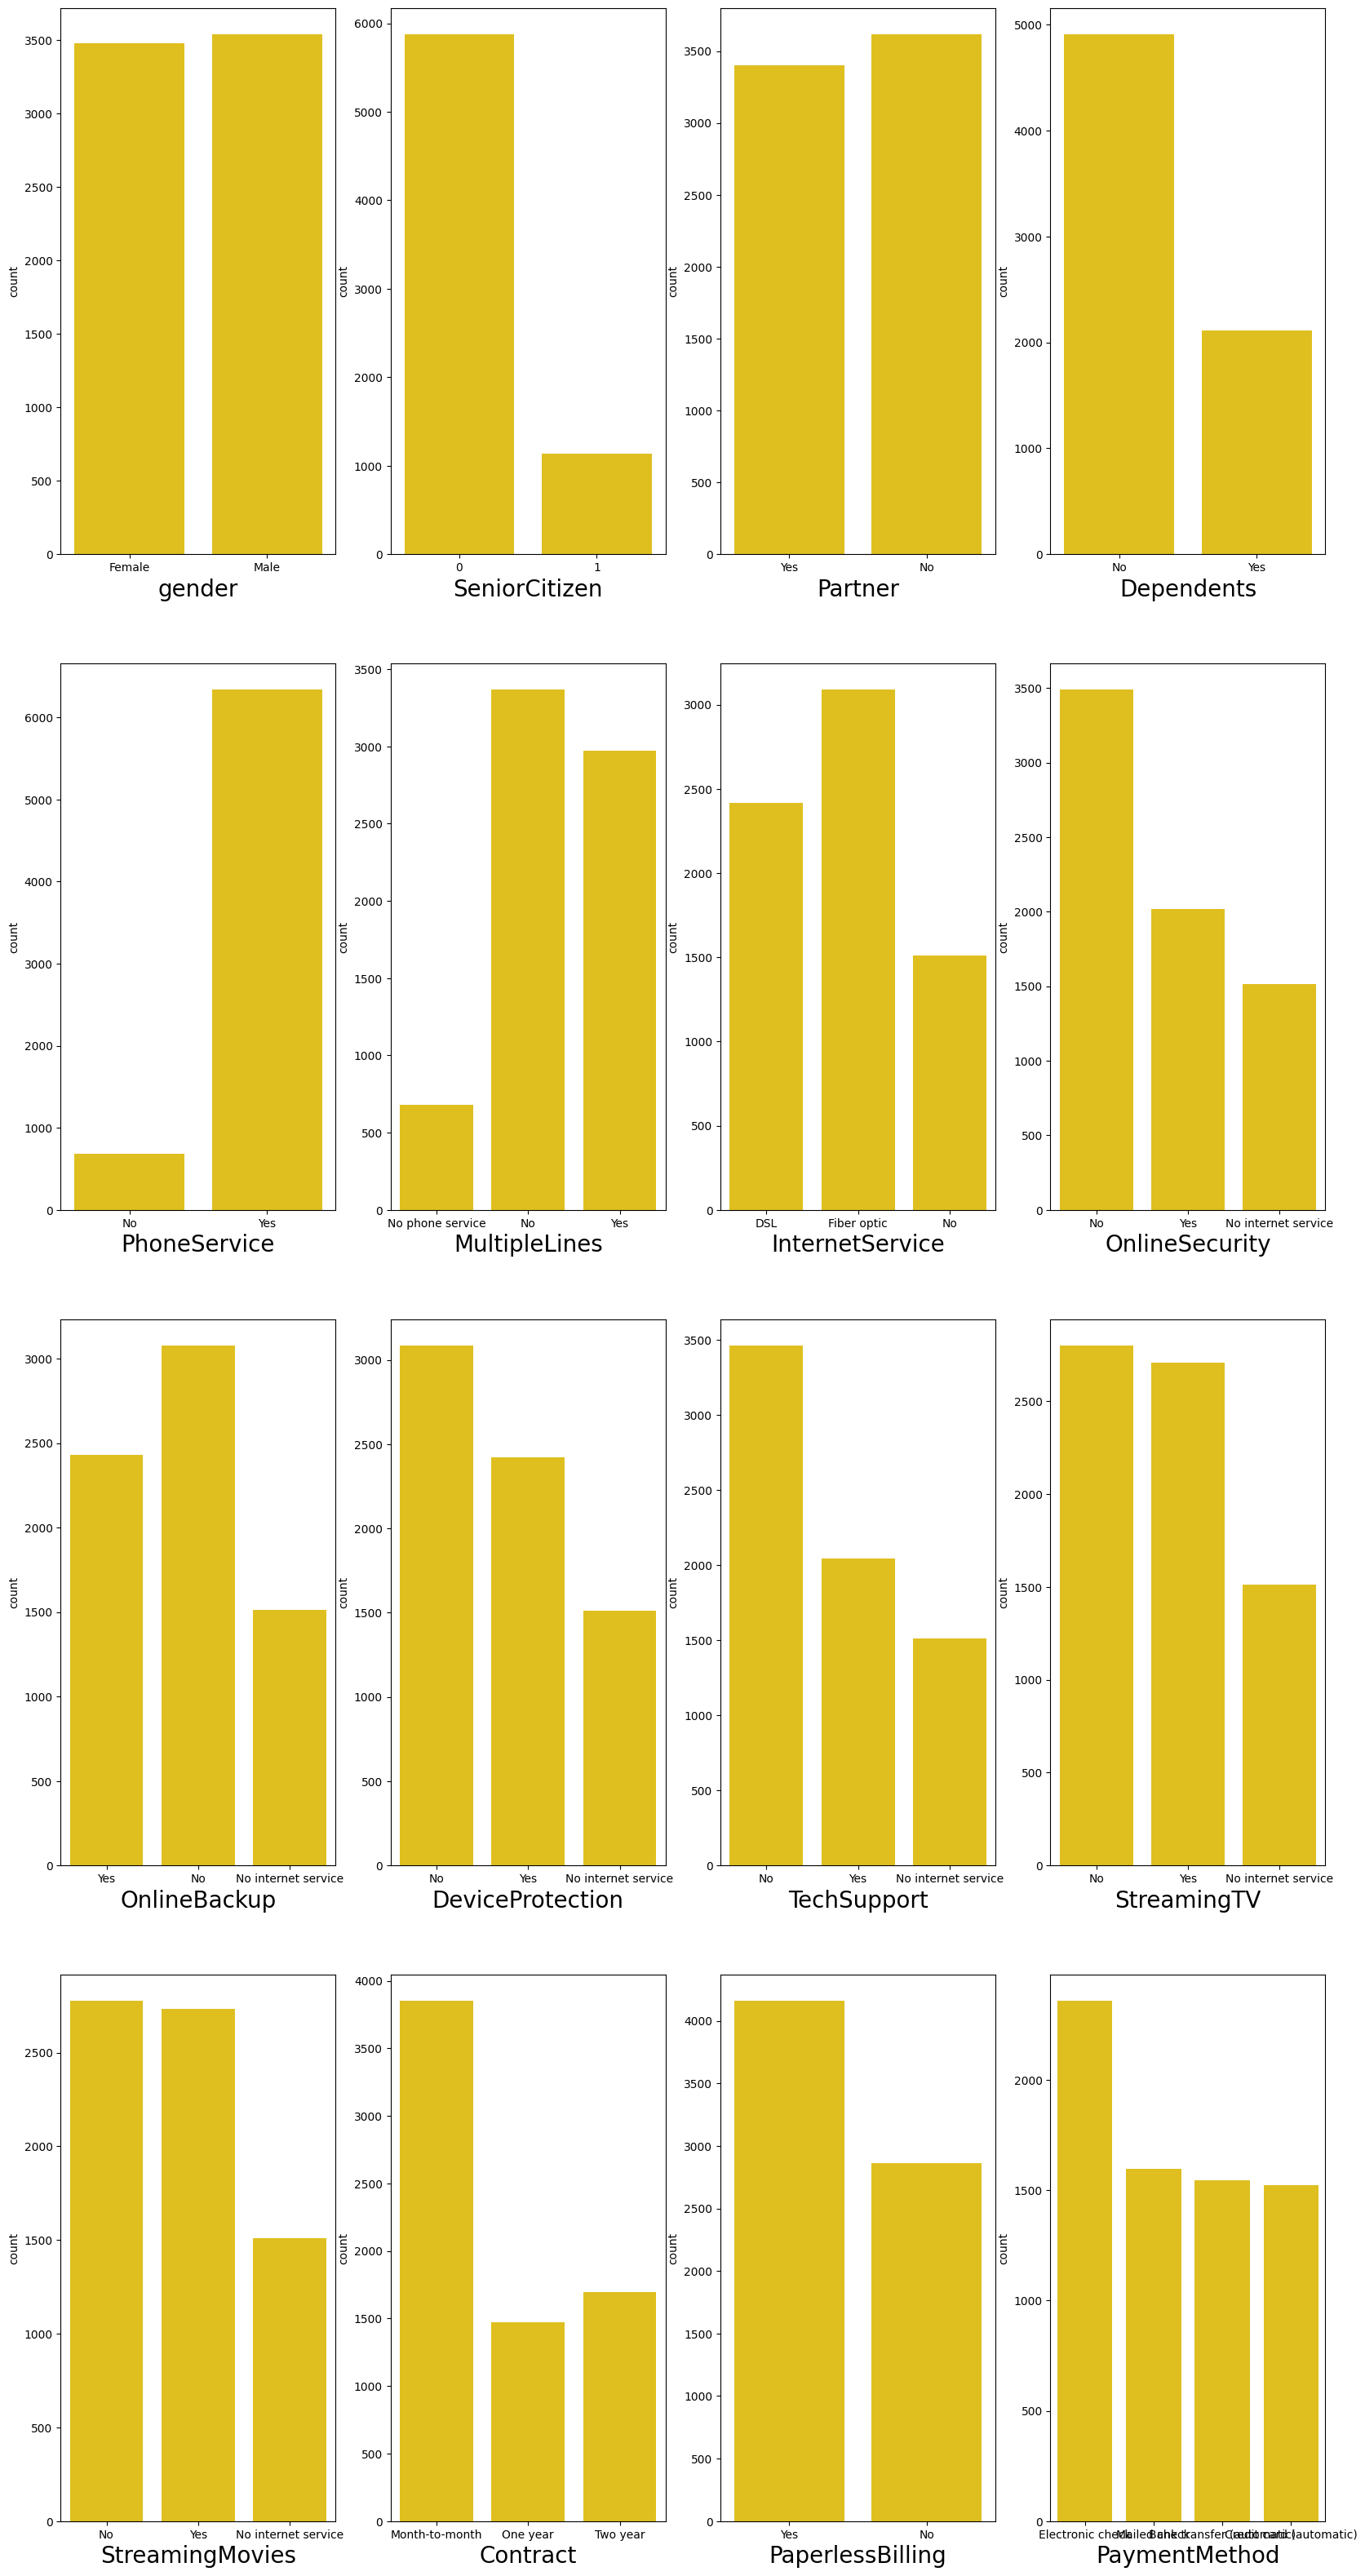

In [24]:
sns.set_palette("hsv")
plt.figure(figsize=(20,40),facecolor="white")
plotnumber = 1
for i in Categorical:
    if plotnumber <=16:
        ax =plt.subplot(4,4,plotnumber)
        sns.countplot(x=df[i])
        plt.xlabel(i,fontsize=20)
    plotnumber+=1
plt.show()

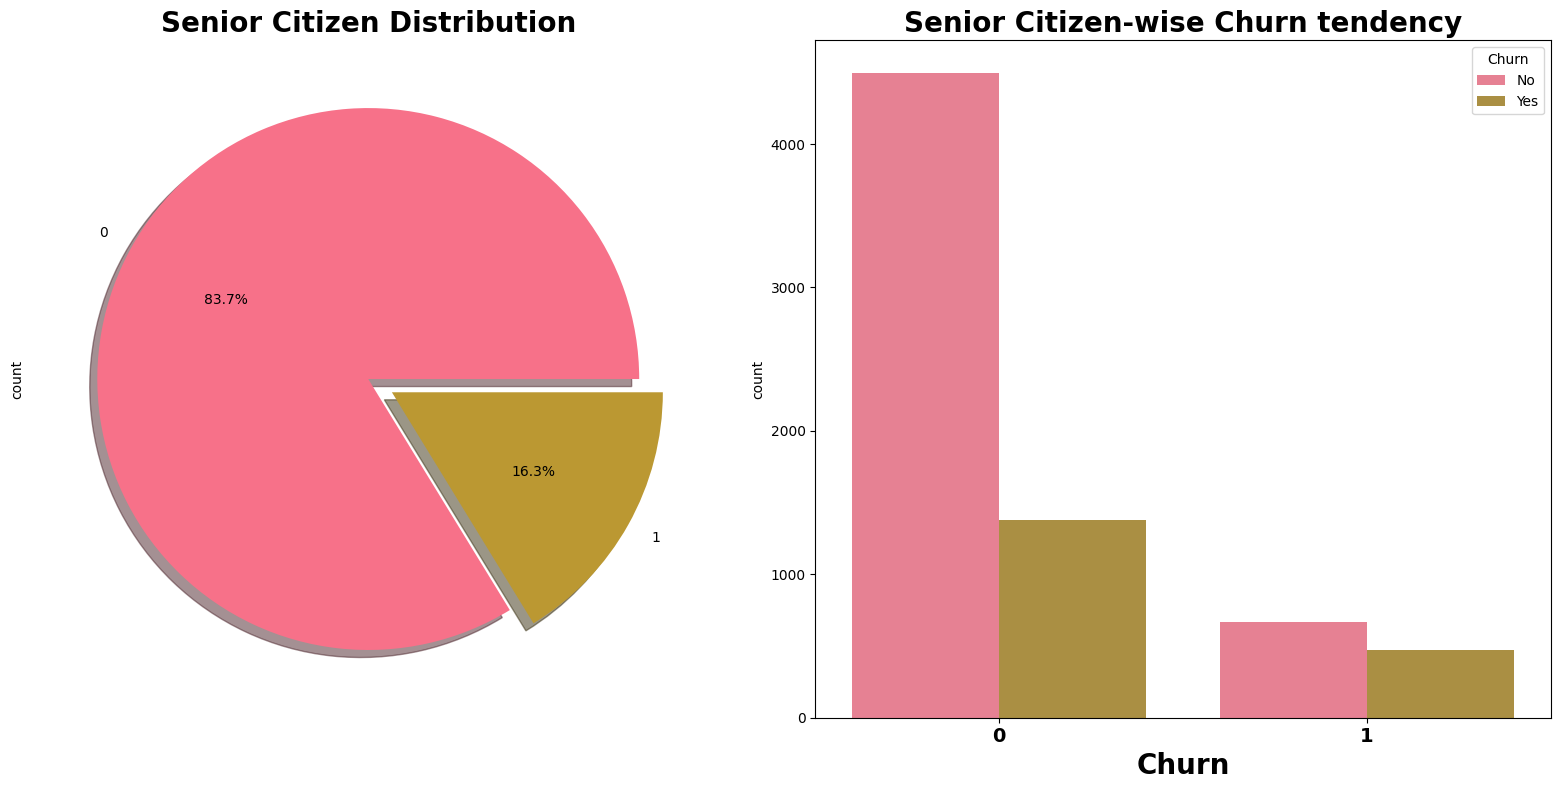

In [25]:
sns.set_palette("husl")
f,ax=plt.subplots(1,2,figsize=(16,8))
df["SeniorCitizen"].value_counts().plot.pie(explode=[0,0.1],autopct="%2.1f%%",ax=ax[0],shadow=True)
ax[0].set_title("Senior Citizen Distribution",fontsize=20,fontweight='bold')
ax[0].set_xlabel('')
sns.countplot(x='SeniorCitizen',hue='Churn',data=df,ax=ax[1])
ax[1].set_title('Senior Citizen-wise Churn tendency',fontsize=20,fontweight='bold')
ax[1].set_xlabel('Churn',fontsize='20',fontweight='bold')
plt.xticks(fontsize=14,fontweight='bold')
plt.tight_layout()
plt.show()

In [26]:
pd.crosstab([df.gender,df.SeniorCitizen],df['Churn'],margins=True).style.background_gradient(cmap='summer_r')

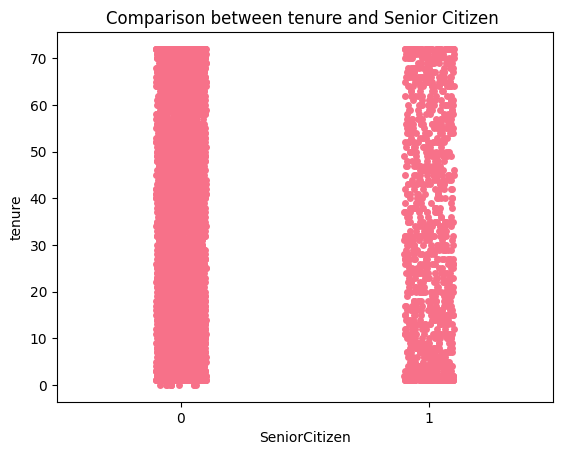

In [27]:
plt.title("Comparison between tenure and Senior Citizen ")
sns.stripplot(x='SeniorCitizen',y='tenure',data=df)
plt.show()

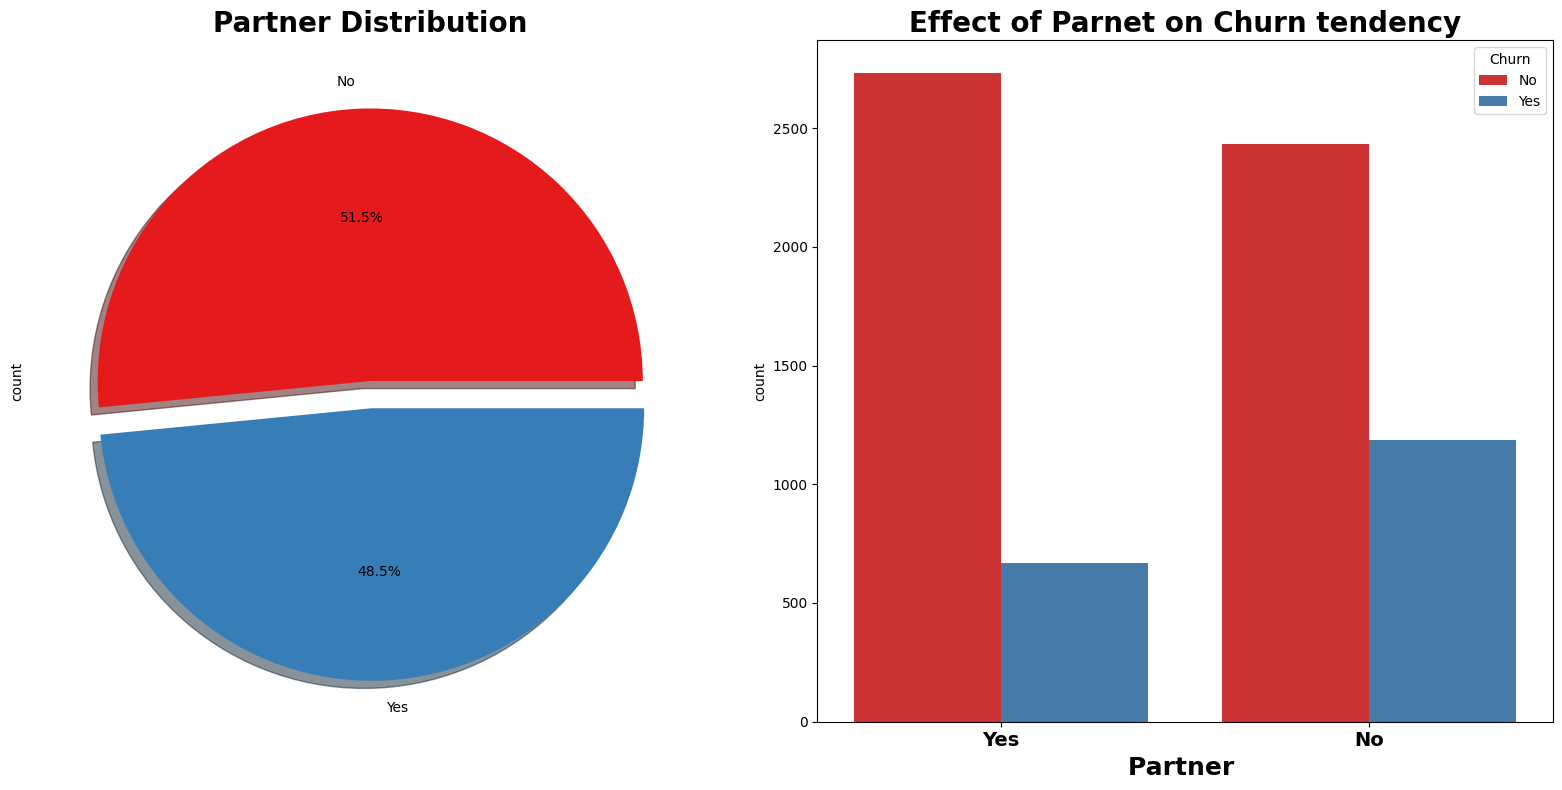

In [28]:
sns.set_palette('Set1')
f,ax=plt.subplots(1,2,figsize=(16,8))
df['Partner'].value_counts().plot.pie(explode=[0,0.1],autopct='%2.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Partner Distribution',fontsize=20,fontweight='bold')
ax[0].set_xlabel('')
sns.countplot(x='Partner',hue="Churn",data=df,ax=ax[1])
ax[1].set_title('Effect of Parnet on Churn tendency',fontsize=20,fontweight='bold')
ax[1].set_xlabel("Partner ",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight='bold')
plt.tight_layout()
plt.show()


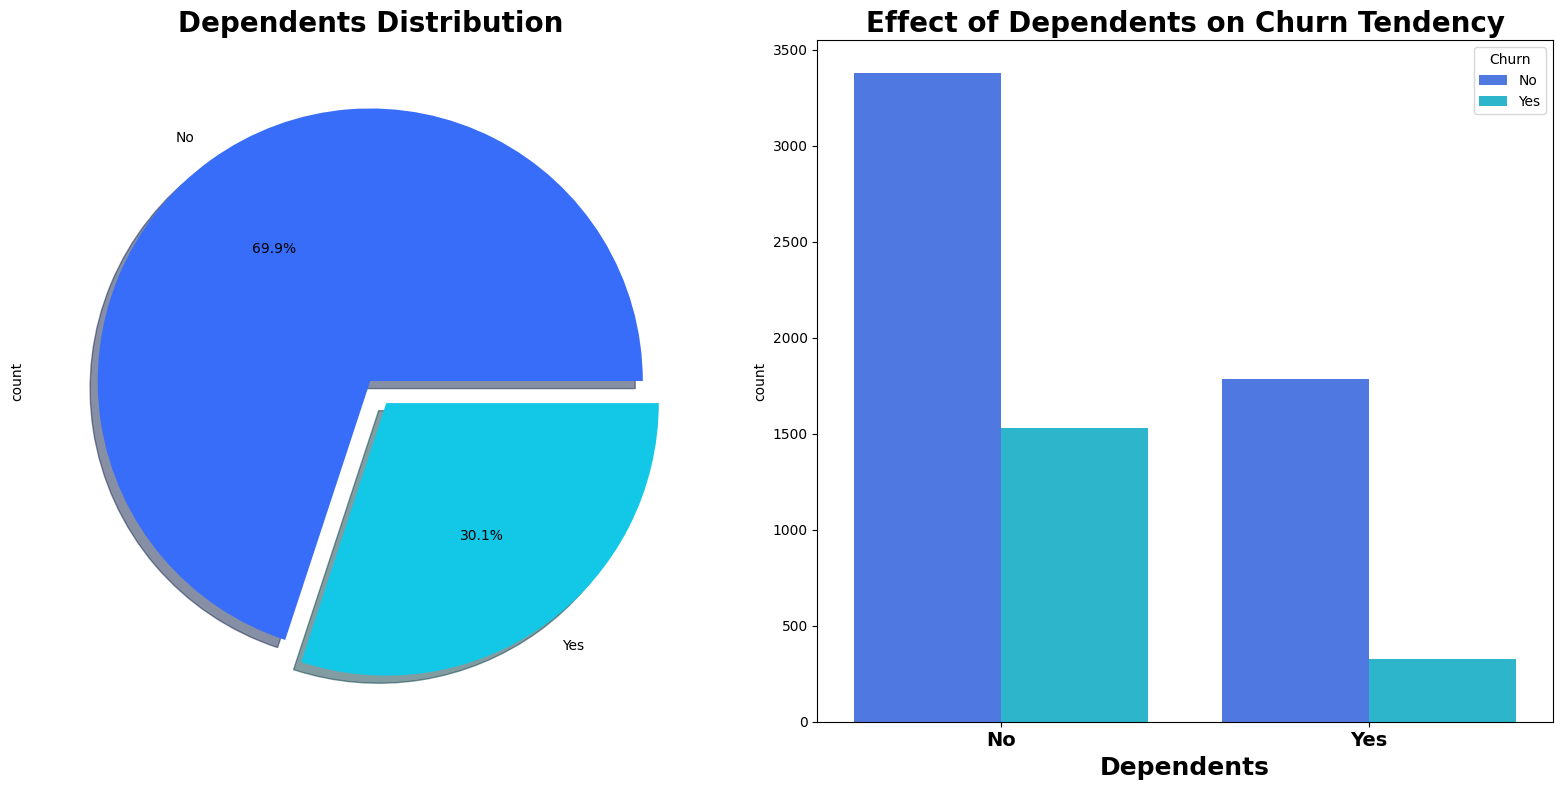

In [29]:
sns.set_palette('rainbow')
f,ax=plt.subplots(1,2,figsize=(16,8))
df['Dependents'].value_counts().plot.pie(explode=[0,0.1],autopct='%2.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Dependents Distribution',fontsize=20,fontweight='bold')
ax[0].set_xlabel('')
sns.countplot(x='Dependents',hue='Churn',data=df,ax=ax[1])
ax[1].set_title('Effect of Dependents on Churn Tendency',fontsize=20,fontweight='bold')
ax[1].set_xlabel('Dependents',fontsize=18,fontweight='bold')
plt.xticks(fontsize=14,fontweight='bold')
plt.tight_layout()
plt.show()

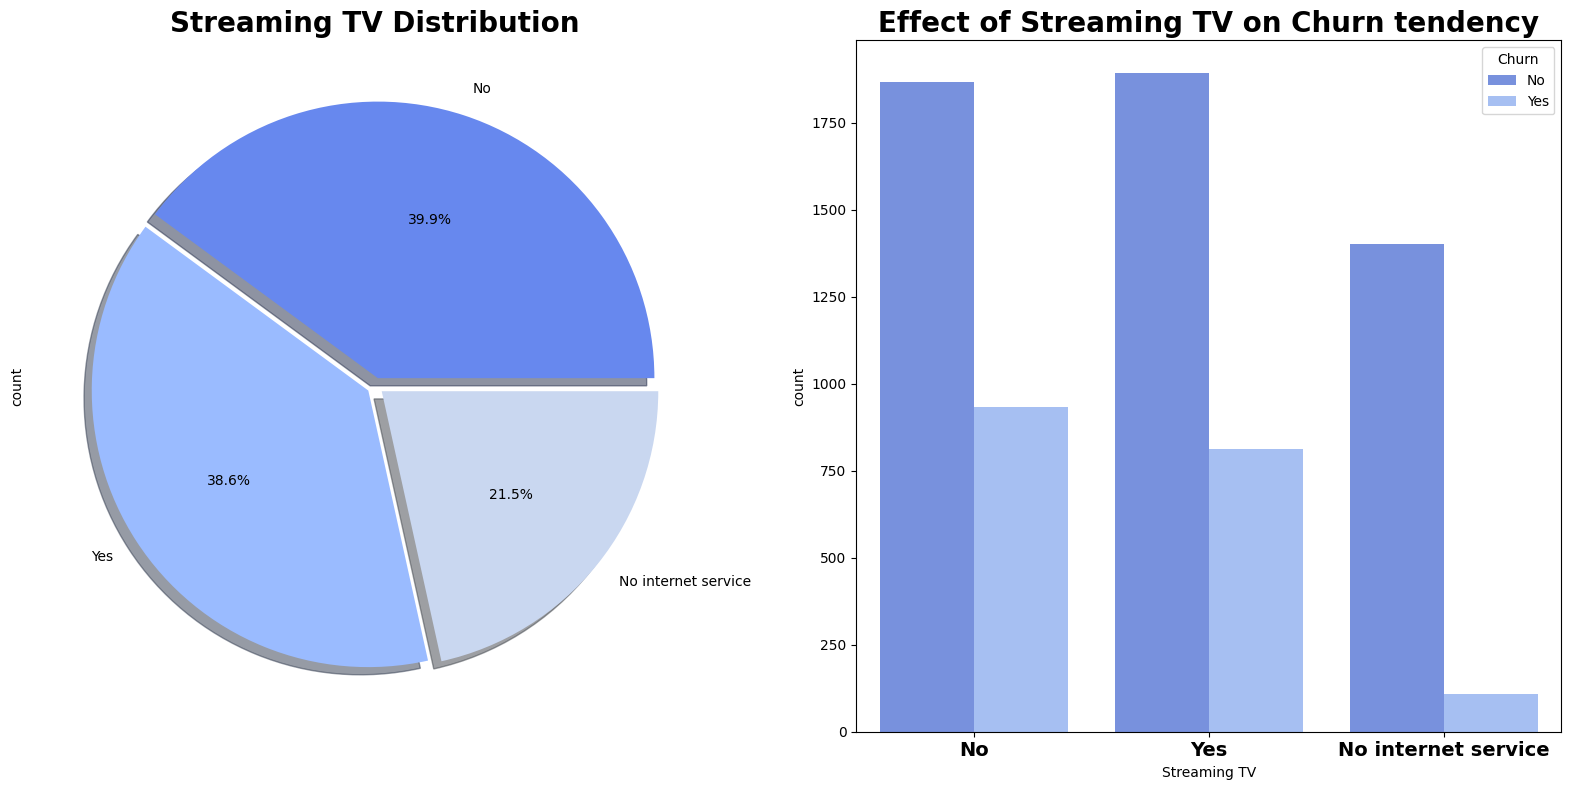

In [30]:
sns.set_palette('coolwarm')
f,ax=plt.subplots(1,2,figsize=(16,8))
df['StreamingTV'].value_counts().plot.pie(explode=[0.03,0.03,0.03],autopct='%2.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Streaming TV Distribution',fontsize=20,fontweight='bold')
ax[0].set_xlabel('')
sns.countplot(x='StreamingTV',hue="Churn",data=df,ax=ax[1])
ax[1].set_title("Effect of Streaming TV on Churn tendency",fontsize=20,fontweight='bold')
ax[1].set_xlabel('Streaming TV')
plt.xticks(fontsize=14,fontweight='bold')
plt.tight_layout()
plt.show()

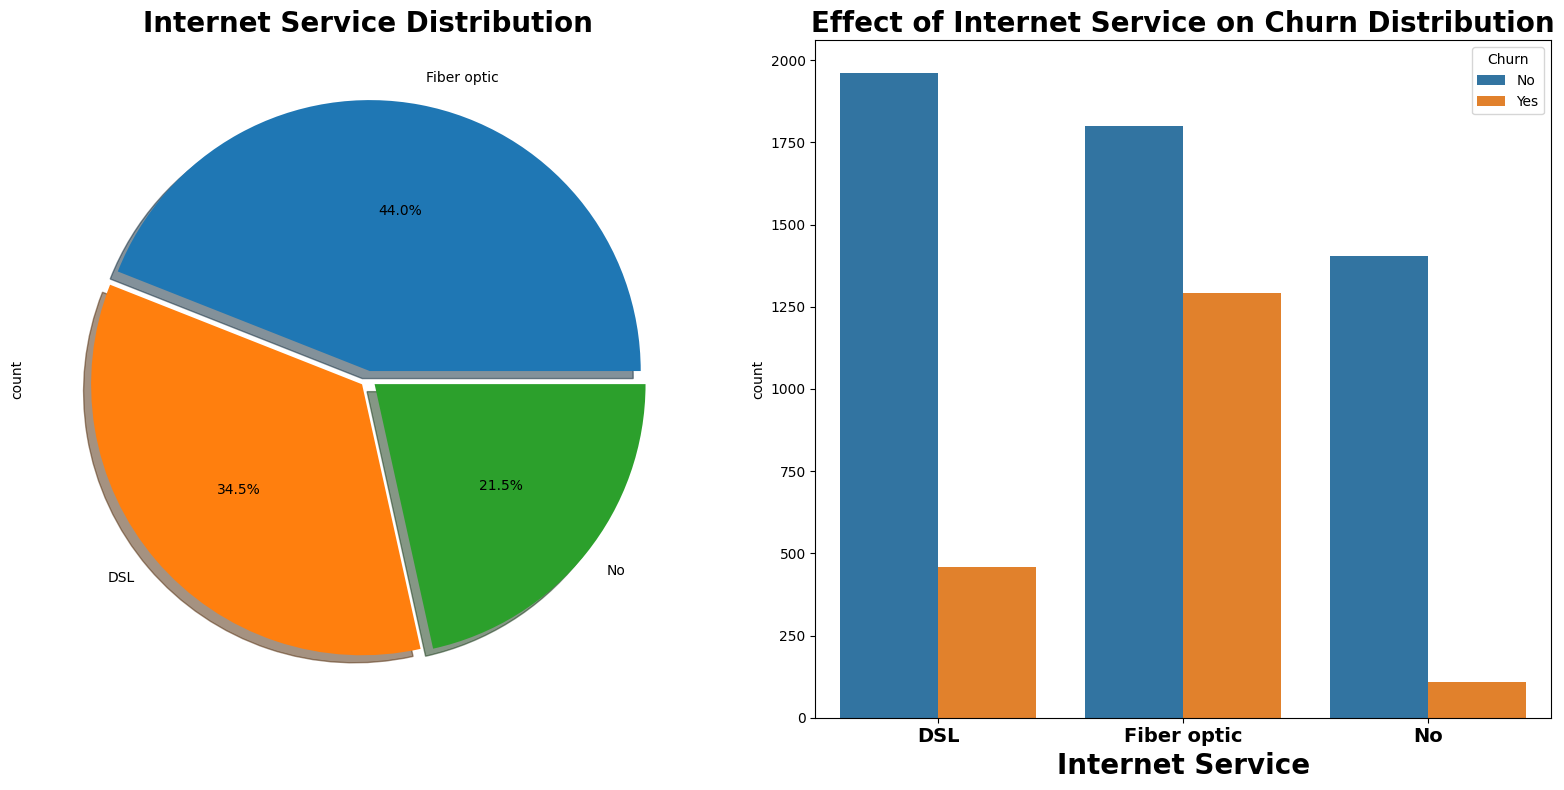

In [33]:
sns.set_palette('tab10')
f,ax=plt.subplots(1,2,figsize=(16,8))
df['InternetService'].value_counts().plot.pie(explode=[0.03,0.03,0.03],autopct='%2.1f%%',ax=ax[0],shadow=True)
ax[0].set_title("Internet Service Distribution",fontsize=20,fontweight='bold')
ax[0].set_xlabel('')
sns.countplot(x='InternetService',hue='Churn',data=df,ax=ax[1])
ax[1].set_title("Effect of Internet Service on Churn Distribution",fontsize=20,fontweight='bold')
ax[1].set_xlabel('Internet Service',fontsize=20,fontweight='bold')
plt.xticks(fontsize=14,fontweight='bold')
plt.tight_layout()
plt.show()

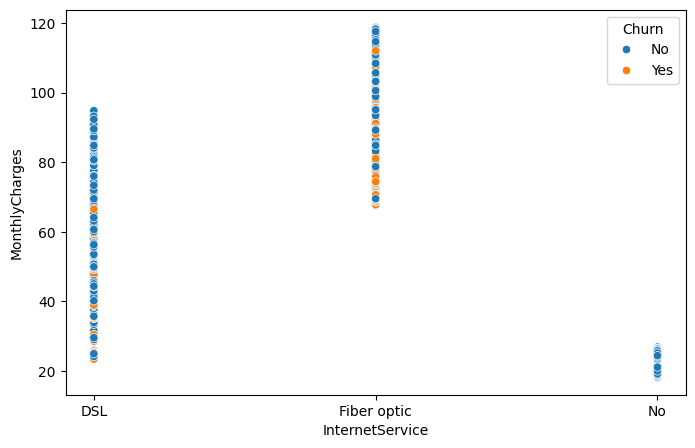

In [35]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='InternetService',y='MonthlyCharges',data=df,hue='Churn')
plt.show()

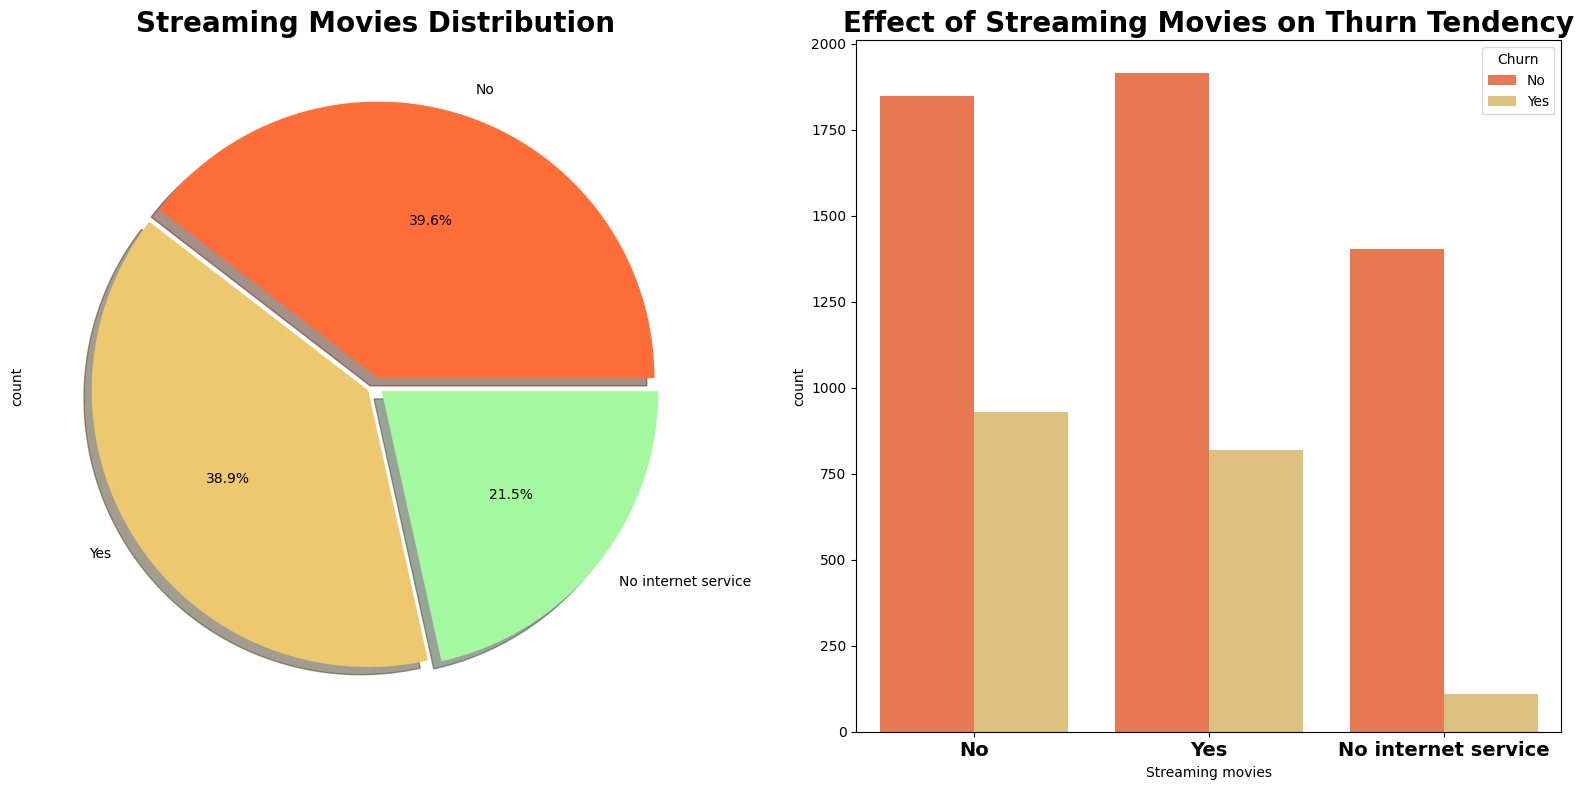

In [47]:

sns.set_palette('rainbow_r')
f,ax=plt.subplots(1,2,figsize=(16,8))
df['StreamingMovies'].value_counts().plot.pie(explode=[0.03,0.03,0.03],autopct='%2.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Streaming Movies Distribution',fontsize=20,fontweight='bold')
ax[0].set_xlabel('')
sns.countplot(x='StreamingMovies',hue='Churn',data=df,ax=ax[1])
ax[1].set_title('Effect of Streaming Movies on Thurn Tendency',fontsize=20,fontweight='bold')
ax[1].set_xlabel('Streaming movies')
plt.xticks(fontsize=14,fontweight ='bold')
plt.tight_layout()
plt.show()

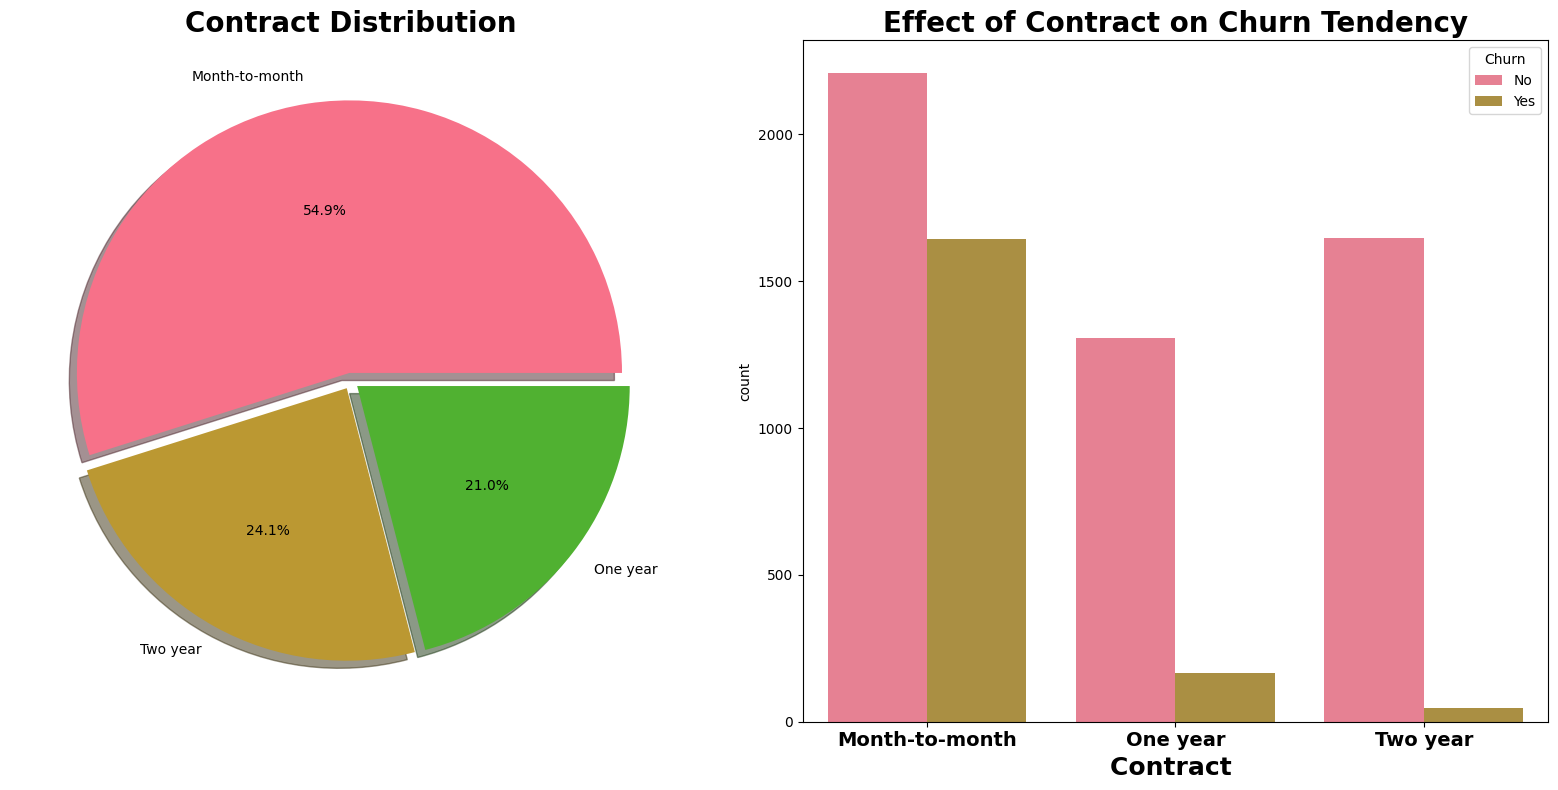

In [42]:
sns.set_palette('husl')
f,ax=plt.subplots(1,2,figsize=(16,8))
df['Contract'].value_counts().plot.pie(explode=[0.03,0.03,0.03],autopct='%2.1f%%',
                                          ax=ax[0],shadow=True)
ax[0].set_title('Contract Distribution', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot(x='Contract',hue="Churn",data=df,ax=ax[1])
ax[1].set_title('Effect of Contract on Churn Tendency',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("Contract ",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.tight_layout()
plt.show()

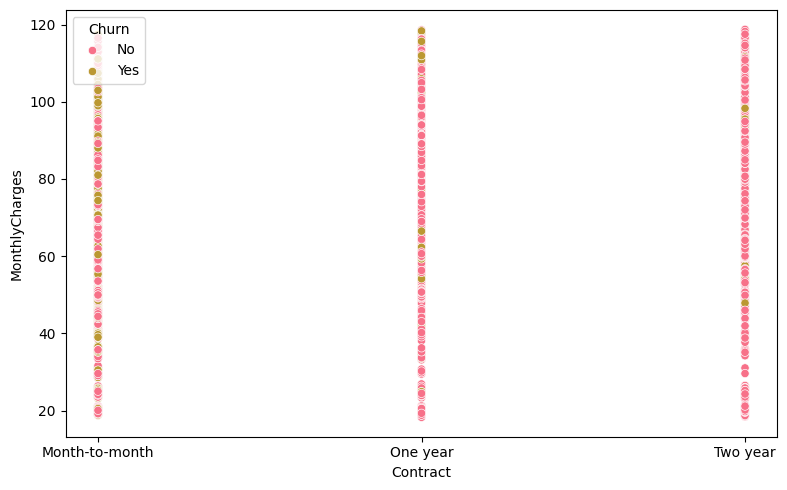

In [43]:
plt.figure(figsize=(8,5))
sns.scatterplot(x="Contract", y='MonthlyCharges',data=df,hue="Churn")
plt.show()

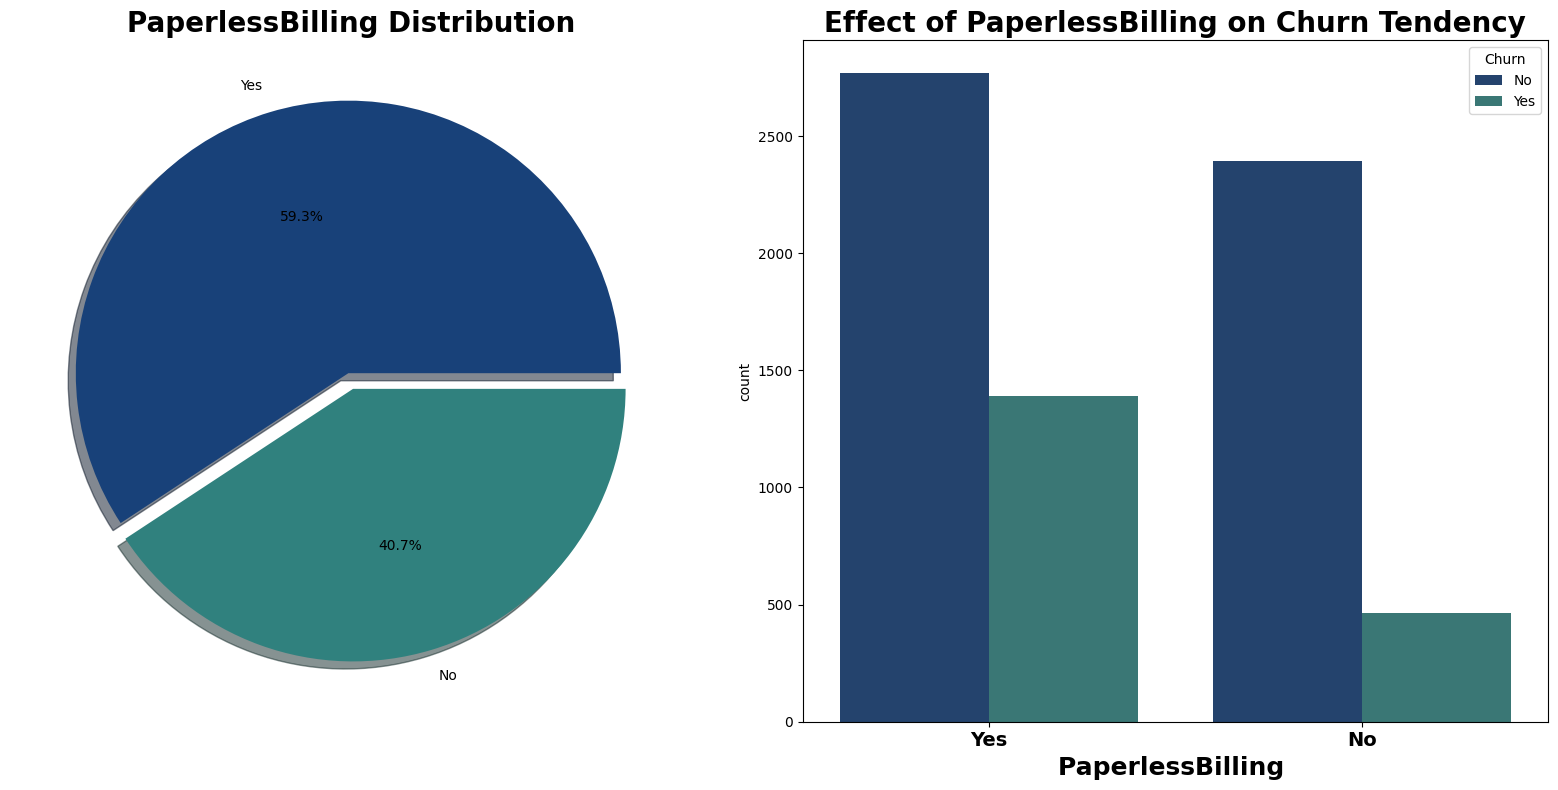

In [45]:
sns.set_palette('gist_earth')
f,ax=plt.subplots(1,2,figsize=(16,8))
df['PaperlessBilling'].value_counts().plot.pie(explode=[0.03,0.03],autopct='%2.1f%%',
                                          ax=ax[0],shadow=True)
ax[0].set_title('PaperlessBilling Distribution', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot(x='PaperlessBilling',hue="Churn",data=df,ax=ax[1])
ax[1].set_title('Effect of PaperlessBilling on Churn Tendency',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("PaperlessBilling ",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.tight_layout()
plt.show()

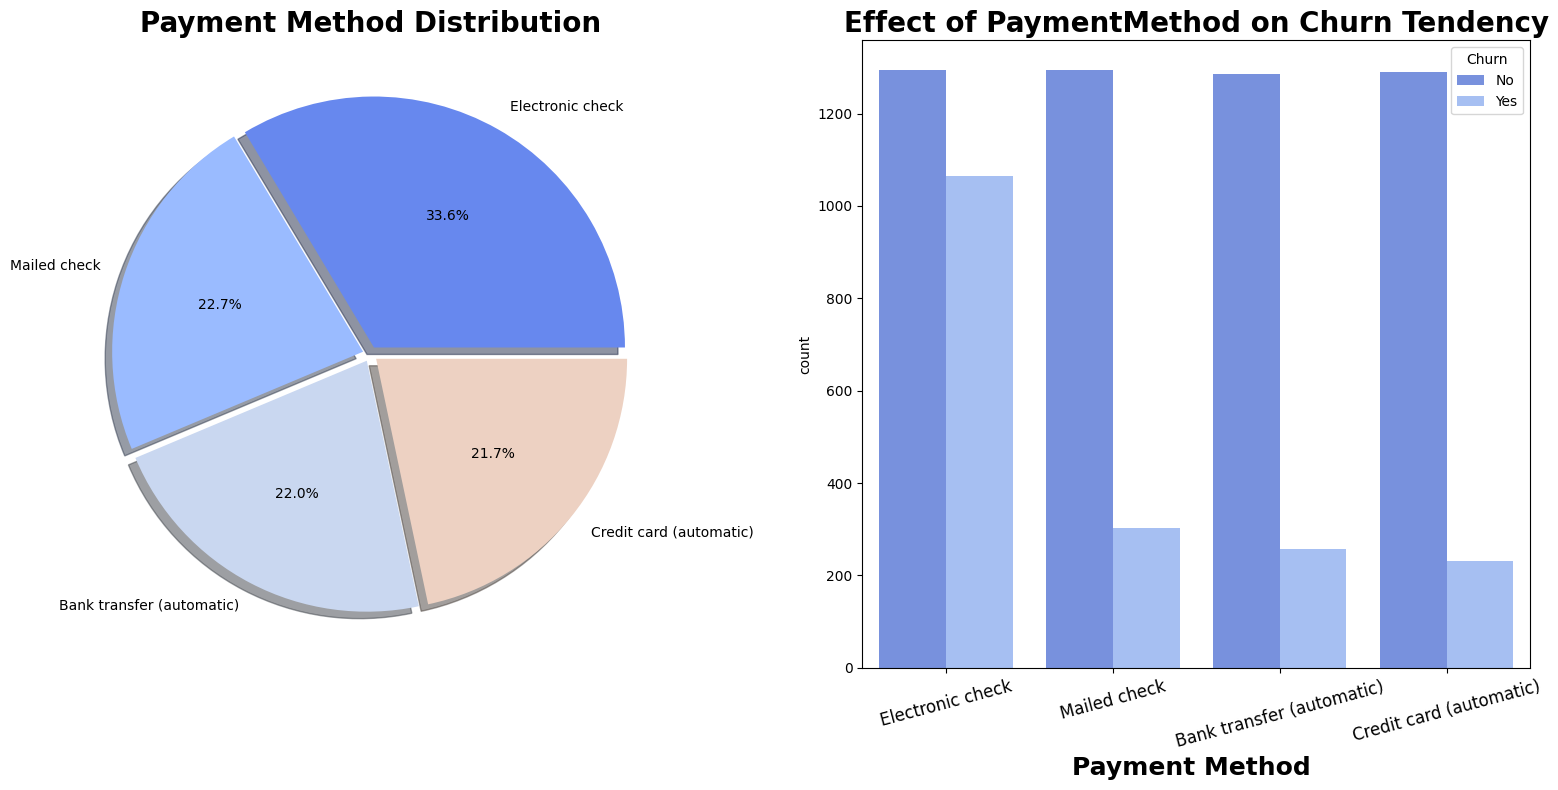

In [46]:
sns.set_palette('coolwarm')
f,ax=plt.subplots(1,2,figsize=(16,8))
df['PaymentMethod'].value_counts().plot.pie(explode=[0.03,0.03,0.03,0.03],autopct='%2.1f%%',
                                          ax=ax[0],shadow=True)
ax[0].set_title('Payment Method Distribution', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot(x='PaymentMethod',hue="Churn",data=df,ax=ax[1])
ax[1].set_title('Effect of PaymentMethod on Churn Tendency',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("Payment Method ",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=12,rotation=15)
plt.tight_layout()
plt.show()

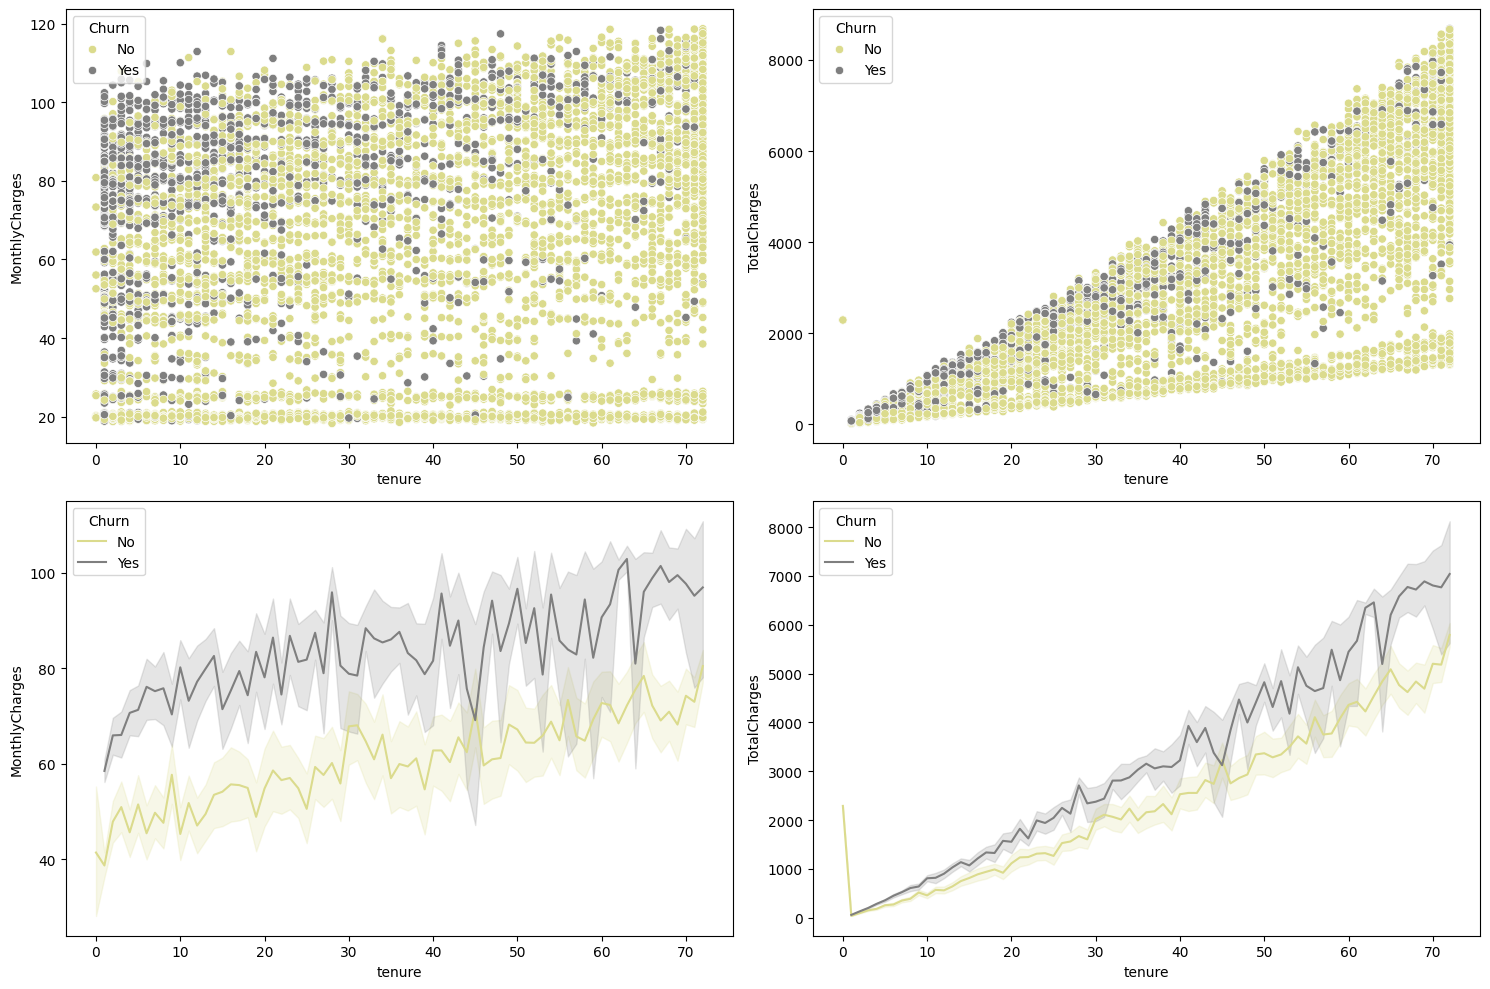

In [49]:
sns.set_palette('tab20_r')
fig,ax=plt.subplots(2,2,figsize=(15,10))
for i,col in enumerate(['MonthlyCharges','TotalCharges']):
    sns.scatterplot(ax=ax[0,i],x='tenure',y=col,data=df,hue='Churn')
    sns.lineplot(ax=ax[1,i],x='tenure',y=col,data=df,hue='Churn')
plt.show()

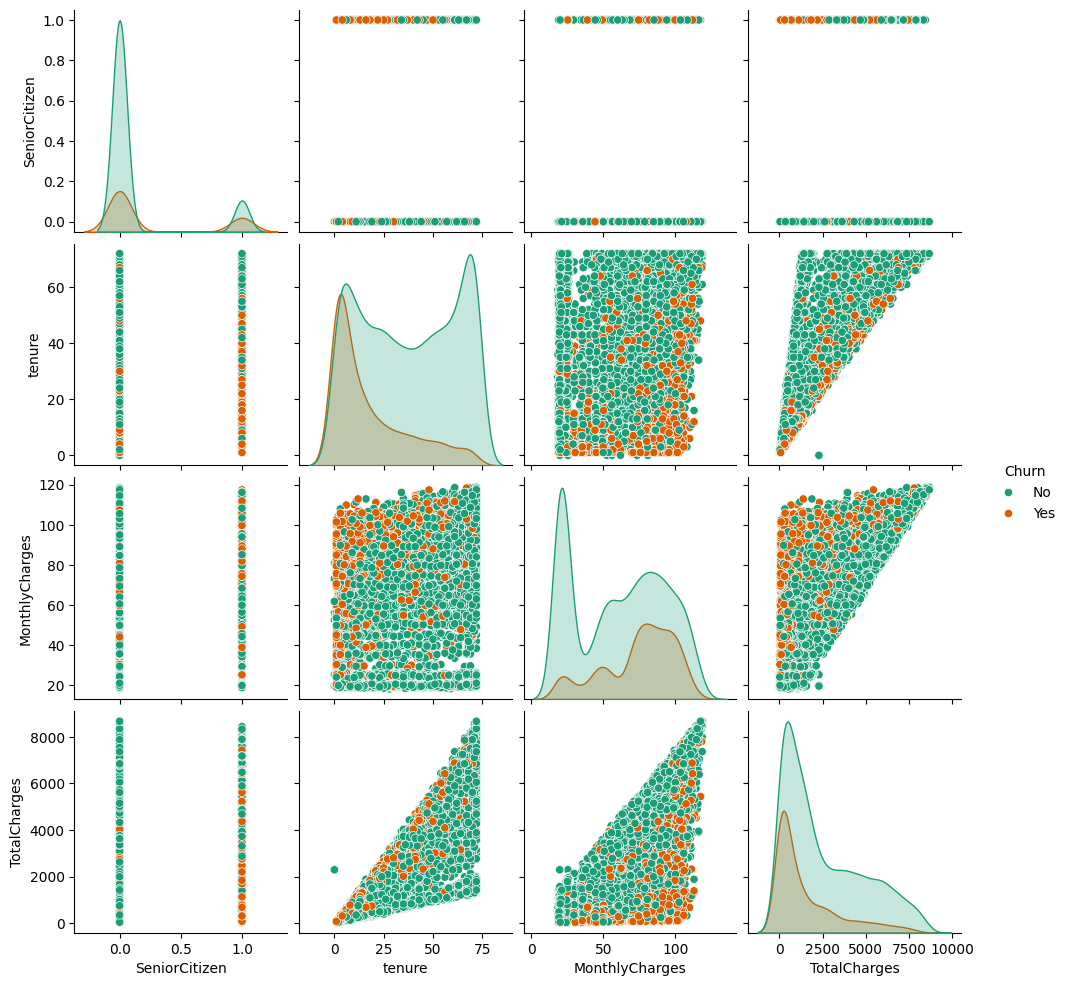

In [50]:
sns.pairplot(df,hue='Churn',palette='Dark2')
plt.show()